In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [33]:
os.chdir("C:/Users/pz413sz/Documents/test_workflows")
data_path = "datasets/HistoricalQuotes.csv"

In [34]:
stock_data = pd.read_csv(data_path)

In [35]:
stock_data.head()

,date,close,volume,open,high,low
0,14:52,"1,087.5058","1,017,434","1,112.66","1,114.35","1,084.42"
1,2019/06/24,1115.5200,1395696.0000,1119.6100,1122.0000,1111.0100
2,2019/06/21,1121.8800,1947591.0000,1109.2400,1124.1100,1108.0800
3,2019/06/20,1111.4200,1262011.0000,1119.9900,1120.1200,1104.7400
4,2019/06/19,1102.3300,1339218.0000,1105.6000,1107.0000,1093.4800


In [36]:
stock_data.drop([0], axis = 0, inplace = True)

In [37]:
stock_data.head()

,date,close,volume,open,high,low
1,2019/06/24,1115.5200,1395696.0000,1119.6100,1122.0000,1111.0100
2,2019/06/21,1121.8800,1947591.0000,1109.2400,1124.1100,1108.0800
3,2019/06/20,1111.4200,1262011.0000,1119.9900,1120.1200,1104.7400
4,2019/06/19,1102.3300,1339218.0000,1105.6000,1107.0000,1093.4800
5,2019/06/18,1103.6000,1386684.0000,1109.6900,1116.3900,1098.9900


In [38]:
stock_data.describe()

,date,close,volume,open,high,low
count,1007,1007,1007,1007,1007,1007
unique,1007,995,1006,983,993,992
top,2018/06/07,1018.3800,2225495.0000,980.0000,1200.0000,1073.5000
freq,1,2,2,3,3,2


In [39]:
for i in list(stock_data.columns):
    if i != "date":
        stock_data[i] = stock_data[i].astype('float', copy=True)
    else:
        stock_data[i] = pd.to_datetime(stock_data[i])

In [40]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 1 to 1007
Data columns (total 6 columns):
date      1007 non-null datetime64[ns]
close     1007 non-null float64
volume    1007 non-null float64
open      1007 non-null float64
high      1007 non-null float64
low       1007 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 55.1 KB


In [41]:
stock_data.head()

,date,close,volume,open,high,low
1,2019-06-24,1115.52,1395696.0,1119.61,1122.00,1111.01
2,2019-06-21,1121.88,1947591.0,1109.24,1124.11,1108.08
3,2019-06-20,1111.42,1262011.0,1119.99,1120.12,1104.74
4,2019-06-19,1102.33,1339218.0,1105.60,1107.00,1093.48
5,2019-06-18,1103.60,1386684.0,1109.69,1116.39,1098.99


In [42]:
stock_data["average"] = (stock_data["high"] + stock_data["low"])/2

In [43]:
stock_data.head()

,date,close,volume,open,high,low,average
1,2019-06-24,1115.52,1395696.0,1119.61,1122.00,1111.01,1116.505
2,2019-06-21,1121.88,1947591.0,1109.24,1124.11,1108.08,1116.095
3,2019-06-20,1111.42,1262011.0,1119.99,1120.12,1104.74,1112.430
4,2019-06-19,1102.33,1339218.0,1105.60,1107.00,1093.48,1100.240
5,2019-06-18,1103.60,1386684.0,1109.69,1116.39,1098.99,1107.690


In [44]:
vol_avg = ["volume", "average"]

In [45]:
#input_feature= stock_data.iloc[:,[2,6]].values
#input_data = input_feature

In [46]:
input_feature = stock_data[vol_avg]

In [47]:
input_data = np.array(input_feature)

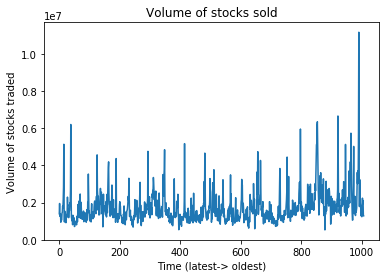

In [48]:
plt.plot(input_data[:,0])
plt.title("Volume of stocks sold")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Volume of stocks traded")
plt.show()

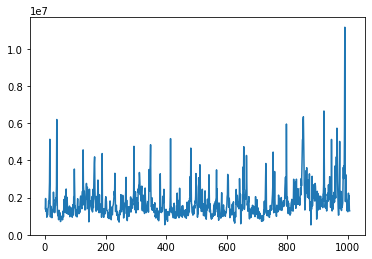

In [49]:
plt.plot(input_feature["volume"])

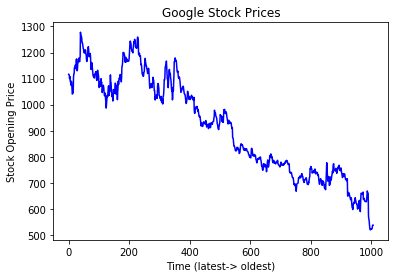

In [50]:
plt.plot(input_data[:,1], color='blue')
plt.title("Google Stock Prices")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()

In [51]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,0:2] = sc.fit_transform(input_data[:,:])

# Go back  50 business days

In [52]:
len(stock_data)

1007

In [53]:
lookback = 50

test_size=int(.2 * len(stock_data))
X=[]
y=[]
for i in range(len(stock_data)-lookback-1):
#    print(i)
#    print("break")
    t=[]
    for j in range(0,lookback):
#        print(j)
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i+ lookback,1])
    
#    print((i+j),(i+lookback))
    

In [54]:
len(X), len(stock_data), len(y)

(956, 1007, 956)

In [55]:
X = np.array(X)

In [56]:
y = np.array(y)

In [57]:
test_size

201

In [58]:
lookback

50

In [59]:
X_test = X[-(test_size+lookback):]
y_test =  y[-(test_size+lookback):]

In [60]:
X_train = X[:-(test_size+lookback)]

In [61]:
y_train =  y[:-(test_size+lookback)]

In [62]:
X_train = X_train.reshape(X_train.shape[0],lookback, 2)

In [63]:
X_test = X_test.reshape(X_test.shape[0],lookback, 2)

In [64]:
X_train.shape

(705, 50, 2)

In [65]:
X_test.shape

(251, 50, 2)

In [66]:
from keras import Sequential
from keras.layers import Dense, LSTM

ModuleNotFoundError: No module named 'keras'

In [38]:
model = Sequential()
model.add(LSTM(units=20, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(LSTM(units=20, return_sequences=True))
model.add(LSTM(units=20))
model.add(Dense(units=1))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 20)            1840      
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 20)            3280      
_________________________________________________________________
lstm_3 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 8,421
Trainable params: 8,421
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
705/705 [==============================] - 8s 12ms/step - loss: 0.1233
Epoch 2/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0118
Epoch 3/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0070
Epoch 4/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0039
Epoch 5/100
705/705 [==============================] - 7s 10ms/step - loss: 0.0027
Epoch 6/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0025
Epoch 7/100
705/705 [==============================] - 7s 10ms/step - loss: 0.0024
Epoch 8/100
705/705 [==============================] - 5s 8ms/step - loss: 0.0024
Epoch 9/100
705/705 [==============================] - 6s 8ms/step - loss: 0.0022
Epoch 11/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0024
Epoch 12/100
705/705 [==============================] - 6s 9ms/step - loss: 0.0021
Epoch 13/100
705/705 [=======================

In [41]:
y_pred= model.predict(X_test)

In [42]:
y_pred

array([[0.23906948],
       [0.23945904],
       [0.23859157],
       [0.23815973],
       [0.24066225],
       [0.2438534 ],
       [0.24639839],
       [0.24819392],
       [0.24956186],
       [0.2506666 ],
       [0.251599  ],
       [0.25337216],
       [0.255001  ],
       [0.2566358 ],
       [0.25792947],
       [0.25932178],
       [0.2610249 ],
       [0.26455948],
       [0.26855585],
       [0.27116835],
       [0.27228552],
       [0.27205646],
       [0.26944137],
       [0.26611626],
       [0.2621544 ],
       [0.258589  ],
       [0.25661284],
       [0.25493398],
       [0.25346133],
       [0.25240216],
       [0.25261408],
       [0.25371543],
       [0.25481528],
       [0.25548276],
       [0.2549342 ],
       [0.2530718 ],
       [0.25016895],
       [0.24705121],
       [0.24534948],
       [0.24617743],
       [0.24918419],
       [0.2536794 ],
       [0.25774607],
       [0.26879975],
       [0.28164163],
       [0.29102805],
       [0.29799613],
       [0.302

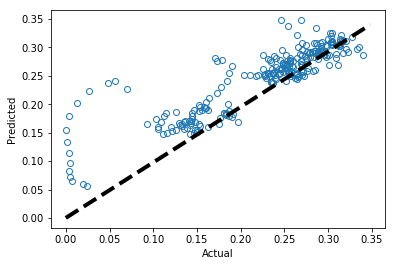

In [43]:
fig, ax = plt.subplots()
ax.plot(y_test, y_pred, 'o', mfc = 'none')
ax.plot([y_test.min(), y_pred.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()